<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-10 05:30:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  60.0MB/s    in 2.5s    

2025-09-10 05:30:05 (60.0 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


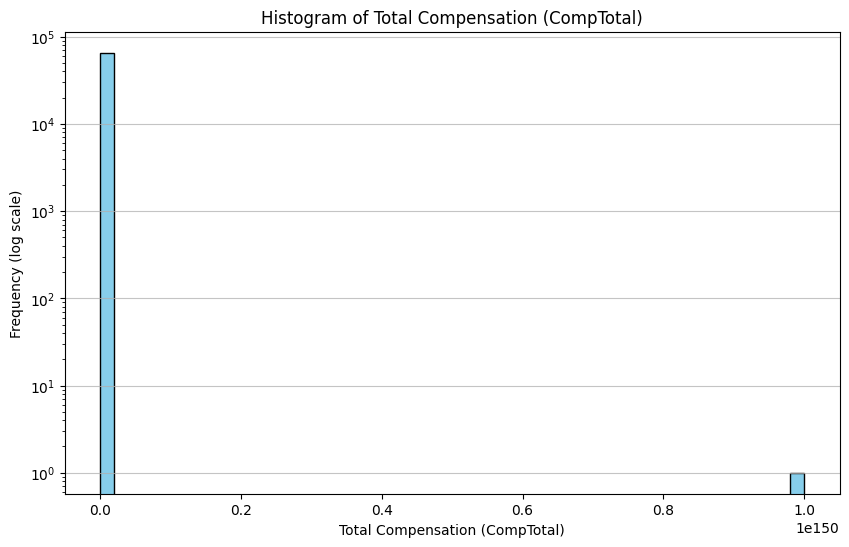

In [16]:
## Write your code here
# Connect to the SQLite database
with sqlite3.connect("survey-data.sqlite") as conn:
    # Read CompTotal column
    df_sql = pd.read_sql("SELECT CompTotal FROM main", conn)

# Replace NaN values with the mean
mean_value = df_sql["CompTotal"].mean(skipna=True)
comp_data = df_sql["CompTotal"].fillna(mean_value)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color="skyblue", edgecolor="black")
plt.yscale("log")  # optional, helps with skewed values
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram of Total Compensation (CompTotal)")
plt.grid(axis="y", alpha=0.75)
plt.show()

**Box Plots**

Plot a box plot of Age.


In [21]:
import numpy as np

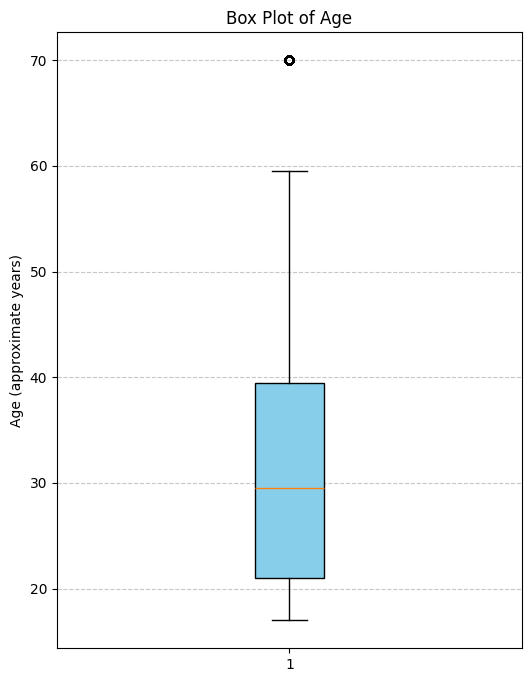

In [22]:
## Write your code here
# Connect to SQLite and read Age column
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age FROM main", conn)

# Define mapping from categories to numeric midpoints
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": np.nan
}

# Apply mapping
df_sql["Age"] = df_sql["Age"].map(age_map)

# Drop NaN values
age_data = df_sql["Age"].dropna()

# Plot boxplot
plt.figure(figsize=(6, 8))
plt.boxplot(age_data, vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.ylabel("Age (approximate years)")
plt.title("Box Plot of Age")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


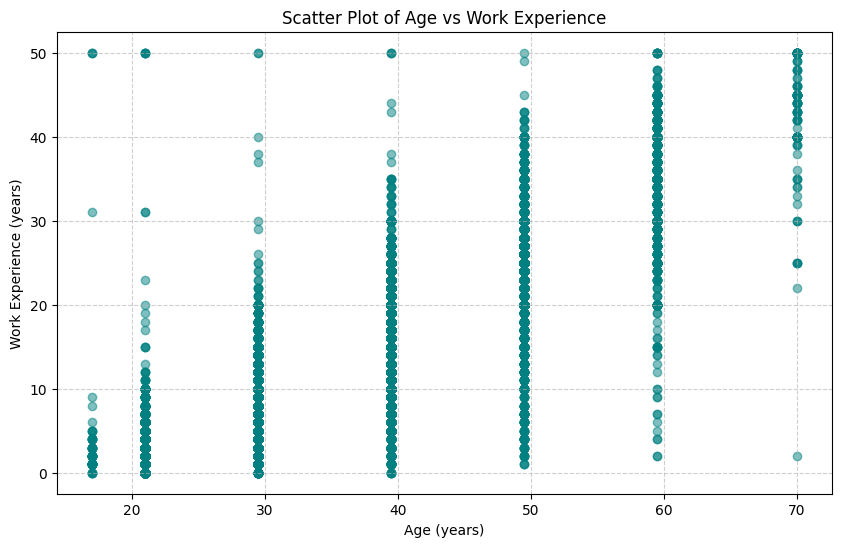

In [25]:
## Write your code here
# Connect to SQLite and read Age and WorkExp columns
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age, WorkExp FROM main", conn)

# Define mapping from categories to numeric midpoints
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": np.nan
}

# Apply mapping
df_sql["Age"] = df_sql["Age"].map(age_map)
# Drop missing values
scatter_data = df_sql.dropna(subset=["Age", "WorkExp"])

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data["Age"], scatter_data["WorkExp"], alpha=0.5, color="teal")
plt.xlabel("Age (years)")
plt.ylabel("Work Experience (years)")
plt.title("Scatter Plot of Age vs Work Experience")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


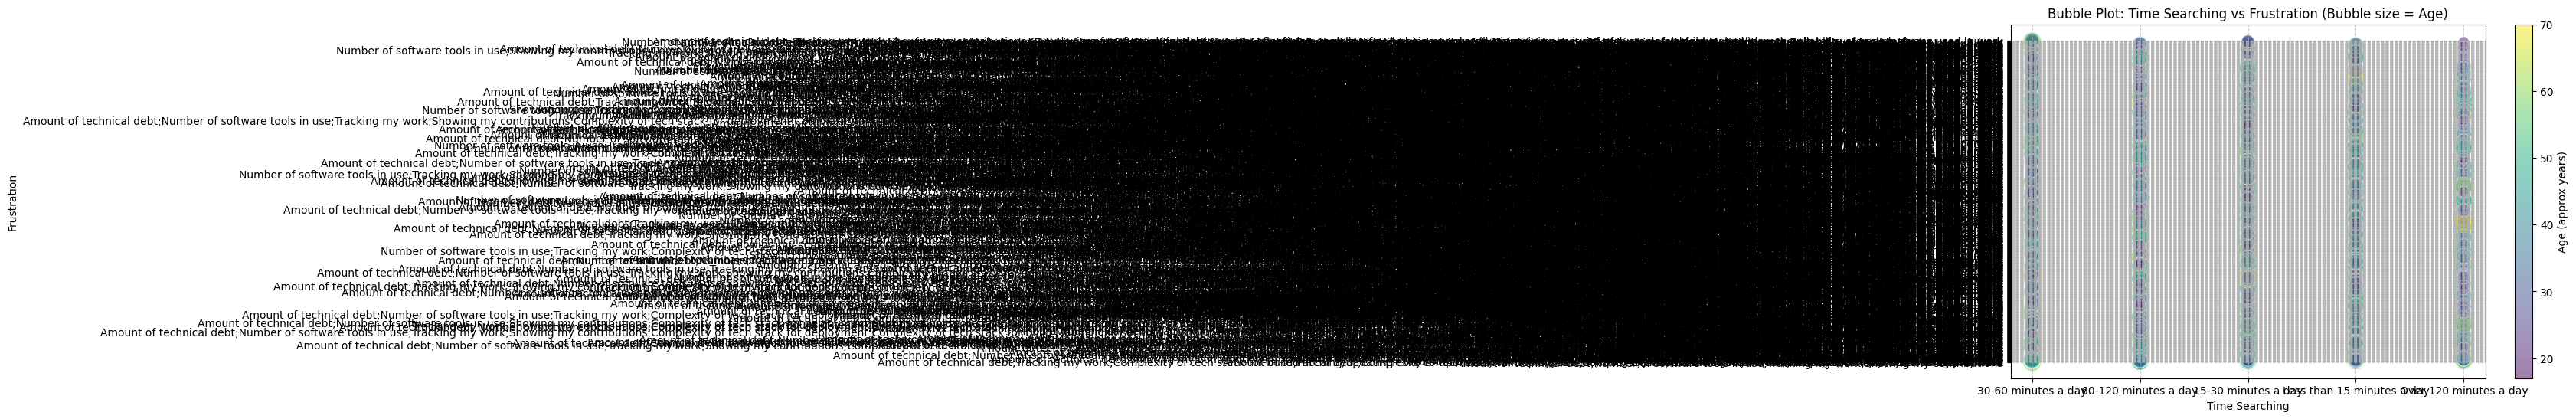

In [26]:
## Write your code here
# Connect to SQLite and read the needed columns
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age, TimeSearching, Frustration FROM main", conn)

# Map Age categories to numeric values for bubble sizing
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": np.nan
}
df_sql["AgeNumeric"] = df_sql["Age"].map(age_map)

# Drop missing values
bubble_data = df_sql.dropna(subset=["TimeSearching", "Frustration", "AgeNumeric"])

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_data["TimeSearching"],
    bubble_data["Frustration"],
    s=bubble_data["AgeNumeric"]*5,  # scale bubble sizes
    alpha=0.5,
    c=bubble_data["AgeNumeric"],    # color by Age too
    cmap="viridis",
    edgecolors="w"
)

plt.xlabel("Time Searching")
plt.ylabel("Frustration")
plt.title("Bubble Plot: Time Searching vs Frustration (Bubble size = Age)")
plt.colorbar(label="Age (approx years)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

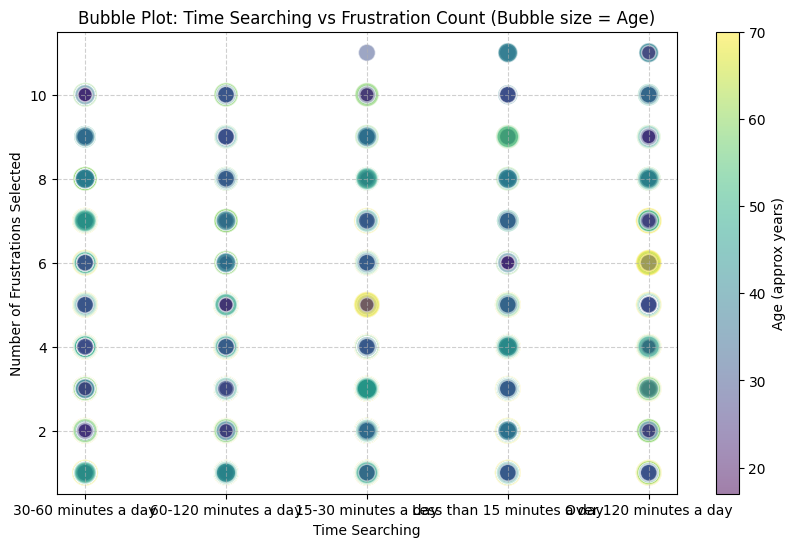

In [27]:
#count number of frustration by each person
# Connect to SQLite and read needed columns
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age, TimeSearching, Frustration FROM main", conn)

# Map Age categories to numeric values for bubble size
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": np.nan
}
df_sql["AgeNumeric"] = df_sql["Age"].map(age_map)

# Convert Frustration to number of selected categories
df_sql["FrustrationCount"] = df_sql["Frustration"].dropna().apply(lambda x: len(x.split(";")))

# Drop missing values
bubble_data = df_sql.dropna(subset=["TimeSearching", "FrustrationCount", "AgeNumeric"])

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_data["TimeSearching"],
    bubble_data["FrustrationCount"],
    s=bubble_data["AgeNumeric"]*5,   # bubble size = Age
    alpha=0.5,
    c=bubble_data["AgeNumeric"],     # bubble color = Age
    cmap="viridis",
    edgecolors="w"
)

plt.xlabel("Time Searching")
plt.ylabel("Number of Frustrations Selected")
plt.title("Bubble Plot: Time Searching vs Frustration Count (Bubble size = Age)")
plt.colorbar(label="Age (approx years)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

                  Age TimeSearching Frustration  Amount of technical debt  \
0  Under 18 years old          None        None                         0   
1     35-44 years old          None        None                         0   
2     45-54 years old          None        None                         0   
3     18-24 years old          None        None                         0   
4     18-24 years old          None        None                         0   

   Complexity of tech stack for build  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Complexity of tech stack for deployment  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Maintainin

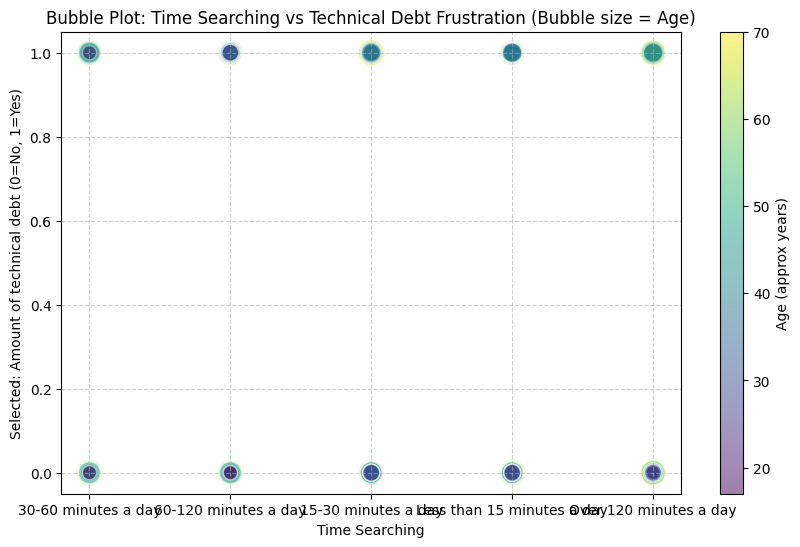

In [28]:
#one hot encoding, separate each frustration and selecting one frustration to display
# Connect and read Age, TimeSearching, Frustration
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age, TimeSearching, Frustration FROM main", conn)

# Expand semicolon-separated Frustration values into multiple columns
frustration_dummies = df_sql["Frustration"].str.get_dummies(sep=";")

# Merge back into main dataframe
df_expanded = pd.concat([df_sql, frustration_dummies], axis=1)

# Preview the new dataframe
print(df_expanded.head())
# Age mapping for bubble size
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": np.nan
}
df_expanded["AgeNumeric"] = df_expanded["Age"].map(age_map)

# Drop missing values
bubble_data = df_expanded.dropna(subset=["TimeSearching", "AgeNumeric", "Amount of technical debt"])

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_data["TimeSearching"],
    bubble_data["Amount of technical debt"],   # binary (0/1)
    s=bubble_data["AgeNumeric"]*5,
    alpha=0.5,
    c=bubble_data["AgeNumeric"],
    cmap="viridis",
    edgecolors="w"
)

plt.xlabel("Time Searching")
plt.ylabel("Selected: Amount of technical debt (0=No, 1=Yes)")
plt.title("Bubble Plot: Time Searching vs Technical Debt Frustration (Bubble size = Age)")
plt.colorbar(label="Age (approx years)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


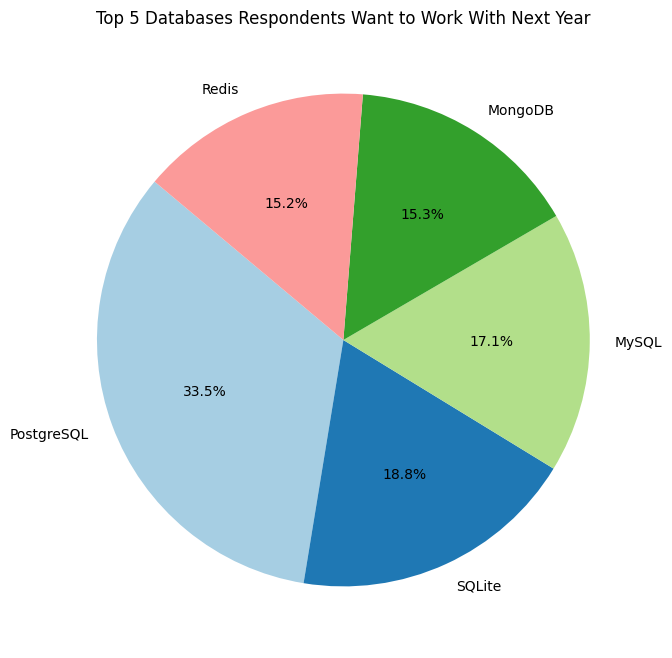

In [29]:
## Write your code here
# Connect to SQLite and read DatabaseWantToWorkWith column
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT DatabaseWantToWorkWith FROM main", conn)

# Split semicolon-separated values into separate rows
db_series = df_sql["DatabaseWantToWorkWith"].dropna().str.split(";").explode()

# Count database frequencies
db_counts = db_series.value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    db_counts,
    labels=db_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Top 5 Databases Respondents Want to Work With Next Year")
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


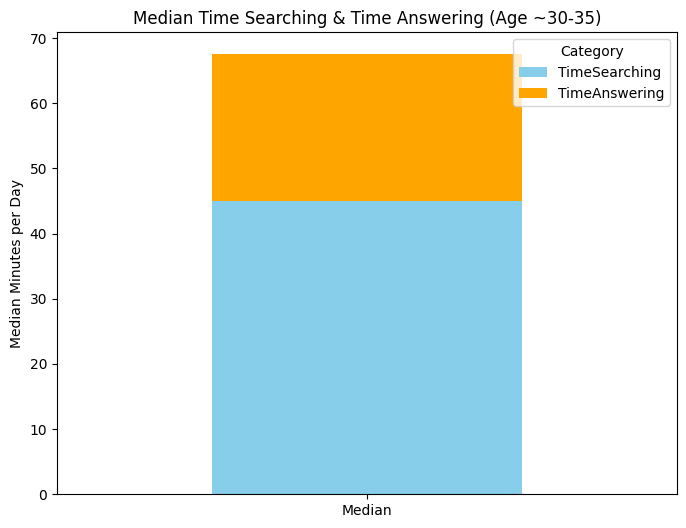

In [31]:
## Write your code here
# Connect and read needed columns
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age, TimeSearching, TimeAnswering FROM main", conn)

# Define mapping of time ranges to numeric midpoints
time_map = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150,
    "NA": np.nan
}

# Apply mapping
df_sql["TimeSearching"] = df_sql["TimeSearching"].map(time_map)
df_sql["TimeAnswering"] = df_sql["TimeAnswering"].map(time_map)

# Filter for Age ~30-35 (use categories 25-34 and 35-44)
age_filter = df_sql["Age"].isin(["25-34 years old", "35-44 years old"])
df_filtered = df_sql[age_filter]

# Compute medians
median_values = df_filtered[["TimeSearching", "TimeAnswering"]].median()

# Create DataFrame for stacked bar
median_df = pd.DataFrame(median_values, columns=["Median"]).T

# Plot stacked bar chart
median_df.plot(kind="bar", stacked=True, figsize=(8, 6), color=["skyblue", "orange"])
plt.title("Median Time Searching & Time Answering (Age ~30-35)")
plt.ylabel("Median Minutes per Day")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


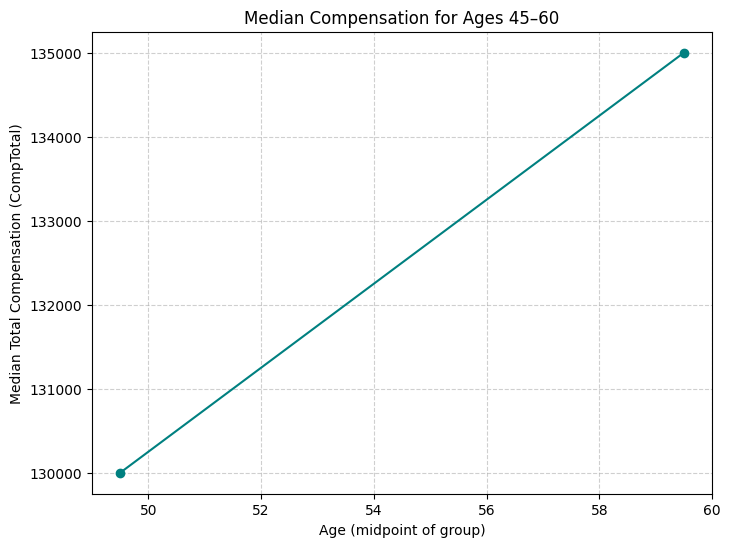

In [32]:
## Write your code here
# Connect and read columns
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT Age, CompTotal FROM main", conn)

# Map Age to numeric midpoints
age_map = {
    "45-54 years old": 49.5,
    "55-64 years old": 59.5
}
df_sql["AgeNumeric"] = df_sql["Age"].map(age_map)

# Filter for Age 45-60 range
df_filtered = df_sql[df_sql["AgeNumeric"].between(45, 60)]

# Group by AgeNumeric and calculate median CompTotal
median_comp = df_filtered.groupby("AgeNumeric")["CompTotal"].median()

# Plot line chart
plt.figure(figsize=(8, 6))
plt.plot(median_comp.index, median_comp.values, marker="o", linestyle="-", color="teal")
plt.xlabel("Age (midpoint of group)")
plt.ylabel("Median Total Compensation (CompTotal)")
plt.title("Median Compensation for Ages 45–60")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


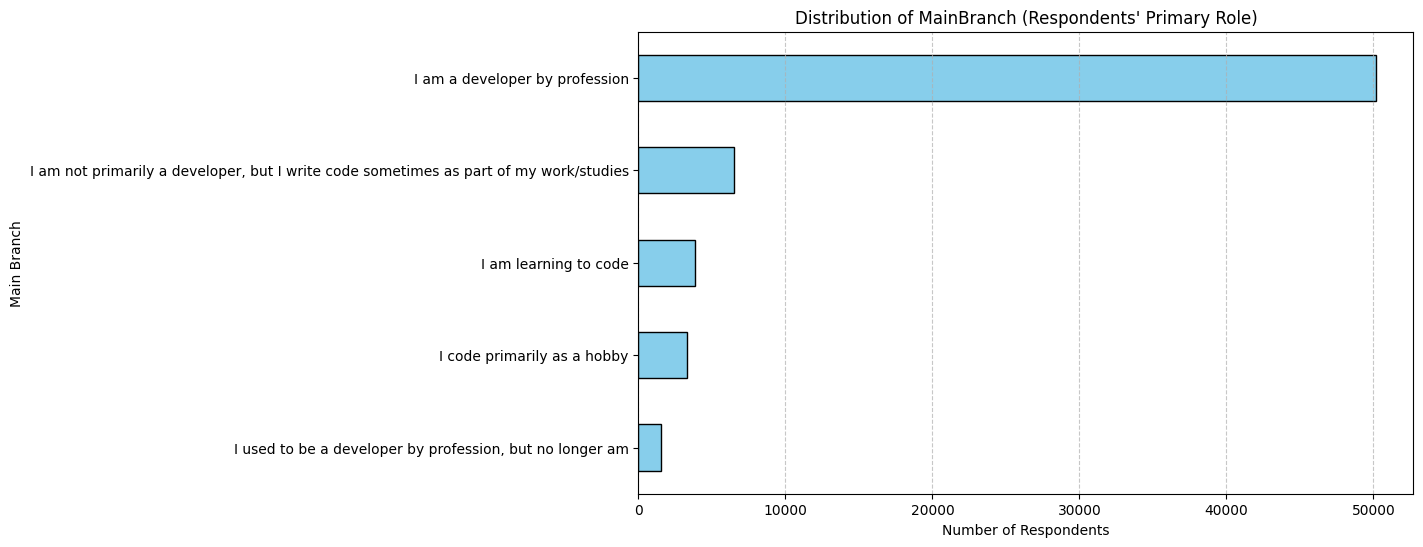

In [33]:
## Write your code here
with sqlite3.connect("survey-data.sqlite") as conn:
    df_sql = pd.read_sql("SELECT MainBranch FROM main", conn)

# Count frequency of each MainBranch category
branch_counts = df_sql["MainBranch"].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
branch_counts.plot(kind="barh", color="skyblue", edgecolor="black")

plt.xlabel("Number of Respondents")
plt.ylabel("Main Branch")
plt.title("Distribution of MainBranch (Respondents' Primary Role)")
plt.gca().invert_yaxis()  # largest at top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [34]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
